<a href="https://colab.research.google.com/github/Bravoback/SVD/blob/main/APS_SVD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from numpy.linalg import svd
"""
Singular Value Decomposition
"""
# matriz de entrada
X = np.array([[3, 3, 2], 
              [2,3,-2]])
print("-------------------------------")
print("Matriz original")
print(X)
print("-------------------------------")
# SVD
U, Singular, V = svd(X)
print("-------------------------------")
print("U: ",U)
print("-------------------------------")
print("Valores Singulares:", Singular)
print("-------------------------------")
print("V^{T}",V.T)
print("-------------------------------")
k=1
rr = np.dot(U[:, :k], np.dot(np.diag(Singular[:k]), V[:k, :]))
print("-------------------------------")
print("rr",rr)
print("-------------------------------")

-------------------------------
Matriz original
[[ 3  3  2]
 [ 2  3 -2]]
-------------------------------
-------------------------------
U:  [[-0.7815437 -0.6238505]
 [-0.6238505  0.7815437]]
-------------------------------
Valores Singulares: [5.54801894 2.86696457]
-------------------------------
V^{T} [[-0.64749817 -0.10759258 -0.75443354]
 [-0.7599438   0.16501062  0.62869461]
 [-0.05684667 -0.9804057   0.18860838]]
-------------------------------
-------------------------------
rr [[2.80756451 3.29513094 0.24648825]
 [2.24107818 2.63026763 0.19675396]]
-------------------------------


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from numpy.linalg import svd
from PIL import Image

def compress_image(img_name, img, k):
    print("processing...")

    # splitting the array into three 2D array (svd only apply on 2D array)
    r = img[:, :, 0]  # array for R
    g = img[:, :, 1]  # array for G
    b = img[:, :, 2]  # array for B

    print("compressing...")

    # Calculating the svd components for all three arrays
    ur, sr, vr = svd(r, full_matrices=False)
    ug, sg, vg = svd(g, full_matrices=False)
    ub, sb, vb = svd(b, full_matrices=False)

    print('dimensões do canal r: {}'.format(r.shape))

    # Forming the compress image with reduced information
    # We are selecting only k singular values for each array to make image which will exclude some information from the
    # image while image will be of same dimension

    # ur (mxk), diag(sr) (kxk) and vr (kxn) if image is off (mxn)
    # so let suppose we only selecting the k1 singular value from diag(sr) to form image

    rr = np.dot(ur[:, :k], np.dot(np.diag(sr[:k]), vr[:k, :]))
    rg = np.dot(ug[:, :k], np.dot(np.diag(sg[:k]), vg[:k, :]))
    rb = np.dot(ub[:, :k], np.dot(np.diag(sb[:k]), vb[:k, :]))

    print("arranging...")

    # Creating a array of zeroes; shape will be same as of image matrix
    rimg = np.zeros(img.shape)

    # Adding matrix for R, G & B in created array
    rimg[:, :, 0] = rr
    rimg[:, :, 1] = rg
    rimg[:, :, 2] = rb

    # It will check if any value will be less than 0 will be converted to its absolute
    # and, if any value is greater than 255 than it will be converted to 255
    # because in image array of unit8 can only have value between 0 & 255
    for ind1, row in enumerate(rimg):
        for ind2, col in enumerate(row):
            for ind3, value in enumerate(col):
                if value < 0:
                    rimg[ind1, ind2, ind3] = abs(value)
                if value > 255:
                    rimg[ind1, ind2, ind3] = 255

    # converting the compress image array to uint8 type for further conversion into image object
    compressed_image = rimg.astype(np.uint8)

    # Showing the compressed image in graph
    plt.title("Image Name - figura compactada: " + img_name + "\n")
    plt.imshow(compressed_image)
    plt.axis('off')
    plt.show()
    cv2.imwrite("Imagem/comp-" + str(img_name) + ".jpg", compressed_image)

    # Uncomment below code if you want to save your compressed image to the file
    # compressed_image = Image.fromarray(compressed_image)
    # compressed_image.save("image_name.jpg")

In [6]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import os
from skimage import io
from google.colab.patches import cv2_imshow

origem = "https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png"
image = io.imread(origem) 
img = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)



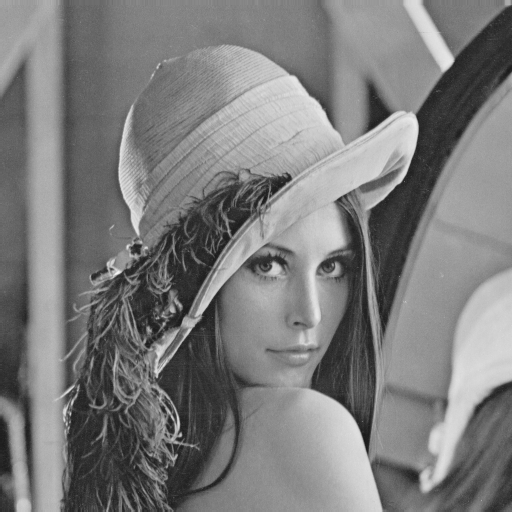

In [7]:
cv2_imshow(img)

In [8]:
image.shape

(512, 512, 3)

308.0
processing...
compressing...
dimensões do canal r: (512, 512)
arranging...


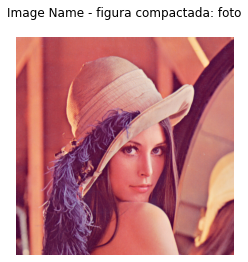

In [13]:
k = np.ceil(0.6*512)
print(k)
k = 308
compress_image("foto", image, k)

359.0
processing...
compressing...
dimensões do canal r: (512, 512)
arranging...


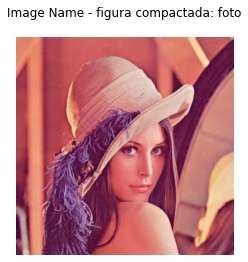

In [15]:
k = np.ceil(0.7*512)
print(k)
k = 359
compress_image("foto", image, k)

410.0
processing...
compressing...
dimensões do canal r: (512, 512)
arranging...


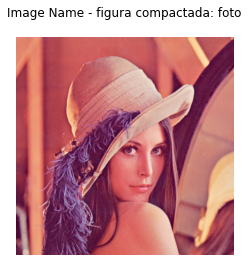

In [17]:
k = np.ceil(0.8*512)
print(k)
k = 410
compress_image("foto", image, k)